In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
customer= pd.read_csv(r'C:\Users\Dell\Downloads\customers_dataset.csv')
order_items= pd.read_csv(r'C:\Users\Dell\Downloads\order_items_dataset.csv')
order_payments= pd.read_csv(r'C:\Users\Dell\Downloads\order_payments_dataset.csv')
order_reviewer= pd.read_csv(r'C:\Users\Dell\Downloads\order_reviews_dataset.csv')
order= pd.read_csv(r'C:\Users\Dell\Downloads\orders_dataset.csv')
product_category= (r'C:\Users\Dell\Downloads\product_category_name_translation.csv')
products= pd.read_csv(r'C:\Users\Dell\Downloads\products_dataset.csv')

# Combine data 

In [2]:
df= order.merge(order_items, on=['order_id'], how='left')
df= df.merge(order_payments, on=['order_id'], how= 'left')
df= df.merge(products, on=['product_id'], how= 'left')
df= df.merge(order_reviewer, on=['order_id'], how='left')
df= df.merge(customer, on=['customer_id'], how='left')

# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_id                    119151 non-null  object 
 2   order_status                   119151 non-null  object 
 3   order_purchase_timestamp       119151 non-null  object 
 4   order_approved_at              118974 non-null  object 
 5   order_delivered_carrier_date   117065 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  119151 non-null  object 
 8   order_item_id                  118318 non-null  float64
 9   product_id                     118318 non-null  object 
 10  seller_id                      118318 non-null  object 
 11  price                          118318 non-null  float64
 12  freight_value                 

In [4]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853


In [5]:
df= df.fillna(value= df.shift(-1))
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   19
order_delivered_carrier_date       344
order_delivered_customer_date      541
order_estimated_delivery_date        0
order_item_id                       67
product_id                          67
seller_id                           67
price                               67
freight_value                       67
payment_sequential                   2
payment_type                         2
payment_installments                 2
payment_value                        2
product_category_name              372
product_name_lenght                372
product_description_lenght         372
product_photos_qty                 372
product_weight_g                    71
product_length_cm                   71
product_height_cm                   71
product_width_cm                    71
review_id                

In [6]:
df.loc[df['order_approved_at'].isnull()==True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30715,1857e77a4bad8abb2db929f107430663,616833eaef04d25b67207119cd6936dc,canceled,2017-08-31 23:55:57,NaN,NaN,NaN,2017-09-28 00:00:00,NaN,NaN,...,cab94b2b92fe84fc842095bdf1451904,5,NaN,"Produto entregue conforme anunciado, inclusive...",2017-09-10 00:00:00,2017-09-11 11:47:30,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
30716,1857e77a4bad8abb2db929f107430663,616833eaef04d25b67207119cd6936dc,canceled,2017-08-31 23:55:57,NaN,NaN,NaN,2017-09-28 00:00:00,NaN,NaN,...,cab94b2b92fe84fc842095bdf1451904,5,NaN,"Produto entregue conforme anunciado, inclusive...",2017-09-10 00:00:00,2017-09-11 11:47:30,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
30717,1857e77a4bad8abb2db929f107430663,616833eaef04d25b67207119cd6936dc,canceled,2017-08-31 23:55:57,NaN,NaN,NaN,2017-09-28 00:00:00,NaN,NaN,...,cab94b2b92fe84fc842095bdf1451904,5,NaN,"Produto entregue conforme anunciado, inclusive...",2017-09-10 00:00:00,2017-09-11 11:47:30,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
30718,1857e77a4bad8abb2db929f107430663,616833eaef04d25b67207119cd6936dc,canceled,2017-08-31 23:55:57,NaN,NaN,NaN,2017-09-28 00:00:00,NaN,NaN,...,cab94b2b92fe84fc842095bdf1451904,5,NaN,"Produto entregue conforme anunciado, inclusive...",2017-09-10 00:00:00,2017-09-11 11:47:30,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
30719,1857e77a4bad8abb2db929f107430663,616833eaef04d25b67207119cd6936dc,canceled,2017-08-31 23:55:57,NaN,NaN,NaN,2017-09-28 00:00:00,NaN,NaN,...,cab94b2b92fe84fc842095bdf1451904,5,NaN,"Produto entregue conforme anunciado, inclusive...",2017-09-10 00:00:00,2017-09-11 11:47:30,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
31907,02e723e8edb4a123d414f56cc9c4665e,6e9f7d9e943f9c0bdea278d9d7a1c9b9,canceled,2017-08-18 14:30:19,NaN,NaN,NaN,2017-09-21 00:00:00,NaN,NaN,...,38821b5c496b678cf91acc34892805ad,5,NaN,Otimo,2017-09-03 00:00:00,2017-09-05 12:12:51,abfe742e782fb10f5c824fcb849e5cd1,18071,sorocaba,SP
41437,896fbd78a9ef3839b34b893f48f6bc67,20153d17ff713721abd8b4c082d5e4d5,canceled,2018-05-12 01:48:33,NaN,NaN,NaN,2018-05-30 00:00:00,NaN,NaN,...,20787e5ce2d5175a20135e52e3a701e8,2,Problemas com entrega,Não chegou ainda estou na esperando ainda,2018-06-03 00:00:00,2018-06-03 12:57:57,b695d6a0f8f032b0529c65cf885ca29a,13510,santa gertrudes,SP
41438,896fbd78a9ef3839b34b893f48f6bc67,20153d17ff713721abd8b4c082d5e4d5,canceled,2018-05-12 01:48:33,NaN,NaN,NaN,2018-05-30 00:00:00,NaN,NaN,...,20787e5ce2d5175a20135e52e3a701e8,2,Problemas com entrega,Não chegou ainda estou na esperando ainda,2018-06-03 00:00:00,2018-06-03 12:57:57,b695d6a0f8f032b0529c65cf885ca29a,13510,santa gertrudes,SP
41439,896fbd78a9ef3839b34b893f48f6bc67,20153d17ff713721abd8b4c082d5e4d5,canceled,2018-05-12 01:48:33,NaN,NaN,NaN,2018-05-30 00:00:00,NaN,NaN,...,20787e5ce2d5175a20135e52e3a701e8,2,Problemas com entrega,Não chegou ainda estou na esperando ainda,2018-06-03 00:00:00,2018-06-03 12:57:57,b695d6a0f8f032b0529c65cf885ca29a,13510,santa gertrudes,SP
41440,896fbd78a9ef3839b34b893f48f6bc67,20153d17ff713721abd8b4c082d5e4d5,canceled,2018-05-12 01:48:33,NaN,NaN,NaN,2018-05-30 00:00:00,NaN,NaN,...,20787e5ce2d5175a20135e52e3a701e8,2,Problemas com entrega,Não chegou ainda estou na esperando ainda,2018-06-03 00:00:00,2018-06-03 12:57:57,b695d6a0f8f032b0529c65cf885ca29a,13510,santa gertrudes,SP


In [8]:
df['order_approved_at'].fillna('2017-08-17 23:30:14',inplace=True)
df['order_delivered_carrier_date'].fillna('7/30/2018  2:31:00 PM', inplace= True)
df['order_delivered_customer_date'].fillna('8/28/2018  2:52:43 PM', inplace= True)
df['order_item_id'].fillna('1', inplace= True)
df['product_id'].fillna('c777355d18b72b67abbeef9df44fd0fd', inplace= True)
df['seller_id'].fillna('df560393f3a51e74553ab94004ba5c87', inplace= True)
df['price'].fillna('59.99', inplace= True)
df['freight_value'].fillna('8.88', inplace= True)
df['product_category_name'].fillna('cama_mesa_banho', inplace= True)
df['review_comment_title'].fillna('Recomendo', inplace= True )
# xóa những dòng giá trị bị null do ở đây có 2 giá trị null rất ít nên có thể loại bỏ
df.dropna(subset=['payment_sequential','payment_type','payment_installments','payment_value'], inplace= True)
# xóa những cột khồn cần thiết
df= df.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_comment_message'], 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17628\1758007020.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_comment_message'], 1)


In [9]:
# ép định dạng về datetime
df['order_purchase_timestamp']=df['order_purchase_timestamp'].astype('datetime64[ns]')
df['order_delivered_carrier_date']=df['order_delivered_carrier_date'].astype('datetime64[ns]')
df['order_delivered_customer_date']=df['order_delivered_customer_date'].astype('datetime64[ns]')
df['order_estimated_delivery_date']=df['order_estimated_delivery_date'].astype('datetime64[ns]')
df['order_approved_at']=df['order_approved_at'].astype('datetime64[ns]')
# chuyển định dạng dtype của 5 columns về datetime để xử lý dữ liệu
df['order_purchase_timestamp']=df['order_purchase_timestamp'].dt.date
df['order_approved_at']=df['order_approved_at'].dt.date
df['order_delivered_carrier_date']=df['order_delivered_carrier_date'].dt.date
df['order_delivered_customer_date']=df['order_delivered_customer_date'].dt.date
df['order_estimated_delivery_date']=df['order_estimated_delivery_date'].dt.date
# ép định dạng về datetime
df['order_purchase_timestamp']=df['order_purchase_timestamp'].astype('datetime64[ns]')
df['order_delivered_carrier_date']=df['order_delivered_carrier_date'].astype('datetime64[ns]')
df['order_delivered_customer_date']=df['order_delivered_customer_date'].astype('datetime64[ns]')
df['order_estimated_delivery_date']=df['order_estimated_delivery_date'].astype('datetime64[ns]')
df['order_approved_at']=df['order_approved_at'].astype('datetime64[ns]')

In [10]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
review_id                        0
review_score                     0
review_comment_title             0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119149 entries, 0 to 119150
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119149 non-null  object        
 1   customer_id                    119149 non-null  object        
 2   order_status                   119149 non-null  object        
 3   order_purchase_timestamp       119149 non-null  datetime64[ns]
 4   order_approved_at              119149 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119149 non-null  datetime64[ns]
 6   order_delivered_customer_date  119149 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119149 non-null  datetime64[ns]
 8   order_item_id                  119149 non-null  object        
 9   product_id                     119149 non-null  object        
 10  seller_id                      119149 non-null  object        
 11  

In [12]:
# Add year and month columns
df['month']= pd.to_datetime(df['order_delivered_customer_date']).dt.month
df['year']= pd.to_datetime(df['order_delivered_customer_date']).dt.year

# Analysis business of company

Business of company follow year and month

In [13]:
turnover= pd.pivot_table(df,index='month', columns='year', values='payment_value', aggfunc=np.sum, fill_value=0).reset_index(drop= False)
turnover

year,month,2016,2017,2018
0,1,0.00,49581.98,1287223.32
1,2,0.00,299280.91,1126280.44
2,3,0.00,493031.40,1489010.59
3,4,0.00,377276.99,1697052.52
4,5,0.00,748048.10,1564823.24
5,6,0.00,638786.67,1556366.60
6,7,0.00,674975.58,1232371.44
7,8,0.00,820275.68,1852796.26
8,9,0.00,913017.69,13626.21
9,10,47165.00,1145864.10,403.04


In [14]:
# revenue by year
turnover_year= df.groupby('year')['payment_value'].sum().reset_index()
xs,ys= turnover_year['year'], turnover_year['payment_value']

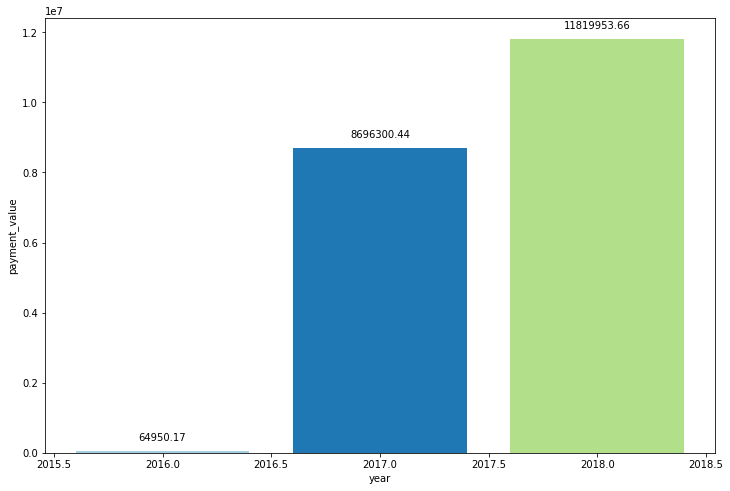

In [15]:
plt.figure(figsize=(12,8))
plt.bar(xs,ys, color= sns.color_palette('Paired'));
plt.xlabel('year')
plt.ylabel('payment_value')
for x,y in zip(xs,ys):
    
        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show()


In [21]:
revenue= df.groupby('year')['payment_value'].sum().to_frame()
revenue['payment_value']

year
2016       64950.17
2017     8696300.44
2018    11819953.66
Name: payment_value, dtype: float64

In [22]:
#revenue by month
turnover_month= df.groupby('month')['payment_value'].sum().reset_index()
x,y= turnover_month['month'], turnover_month['payment_value']

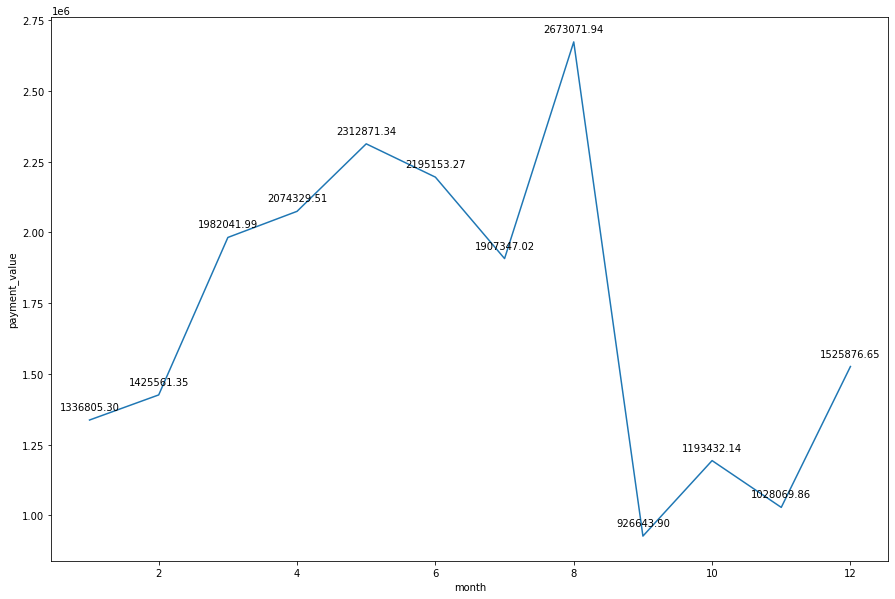

In [23]:
plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.xlabel('month')
plt.ylabel('payment_value')
for a,b in zip(x,y):
    
        label = "{:.2f}".format(b)

        plt.annotate(label, # this is the text
                    (a,b), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show()

 Top 10 product bring revenue highest for company

In [24]:
df.groupby('product_category_name')['payment_value'].sum().nlargest(10).reset_index()

,product_category_name,payment_value
0,cama_mesa_banho,1835536.12
1,beleza_saude,1698618.27
2,informatica_acessorios,1632088.07
3,moveis_decoracao,1467912.58
4,relogios_presentes,1447259.96
5,esporte_lazer,1428452.25
6,utilidades_domesticas,1122526.18
7,automotivo,871413.45
8,ferramentas_jardim,850066.44
9,cool_stuff,791861.64


Number of order delivered and cancel

In [25]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [26]:
canceled_df= df.loc[df['order_status']=='canceled']

In [27]:
delivered= df.groupby('order_status')['customer_id'].count().nlargest(3).to_frame()
delivered.drop(delivered[(delivered.customer_id <115729) & (delivered.customer_id >750)].index, inplace= True)

In [28]:
delivered['proportion']= delivered['customer_id']/ sum(delivered['customer_id'])*100 
delivered

,customer_id,proportion
order_status,,
delivered,115729,99.356107
canceled,750,0.643893


In [29]:
canceled_df.groupby('customer_id')['order_status'].count().nlargest(10).to_frame()

,order_status
customer_id,
33b3ac58c257992bb9f0dff11643b8d0,9
20153d17ff713721abd8b4c082d5e4d5,8
616833eaef04d25b67207119cd6936dc,6
c52f8523a6448c43354e5ca966f61e4c,6
d9335c099e6943d88ac5f8a7cb418b66,6
e91409937a0fd26a57310548858d1762,6
0340b2de09f18a986fea9f26cc7b2d9c,5
44d53248bdd39a477bcf6278e73a2844,5
55c72a24117236fa6e1e89bb2b4a02e0,5


Here is a summary table showing the customer ids with the most order cancellations

In [30]:
canceled_df.groupby('customer_id')['order_status'].count().nlargest(10).to_frame()

,order_status
customer_id,
33b3ac58c257992bb9f0dff11643b8d0,9
20153d17ff713721abd8b4c082d5e4d5,8
616833eaef04d25b67207119cd6936dc,6
c52f8523a6448c43354e5ca966f61e4c,6
d9335c099e6943d88ac5f8a7cb418b66,6
e91409937a0fd26a57310548858d1762,6
0340b2de09f18a986fea9f26cc7b2d9c,5
44d53248bdd39a477bcf6278e73a2844,5
55c72a24117236fa6e1e89bb2b4a02e0,5


Type of payments

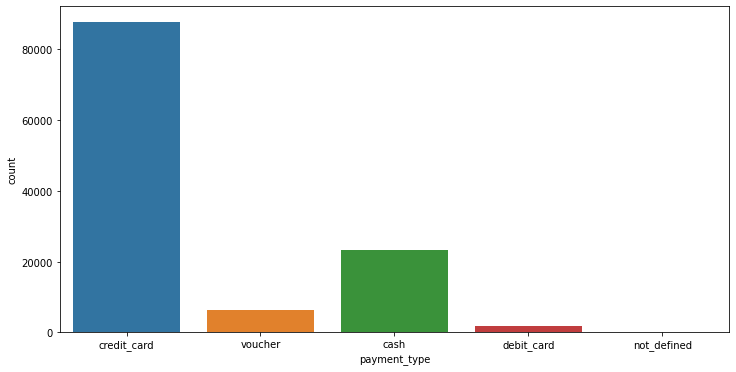

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='payment_type');

Number of star customer evaluate

In [32]:
star= df.groupby('review_score')['customer_id'].count().reset_index(name='count')
ax= star['review_score']
bx= star['count']
labels=['1 point','2 point','3 point','4 point','5 point']

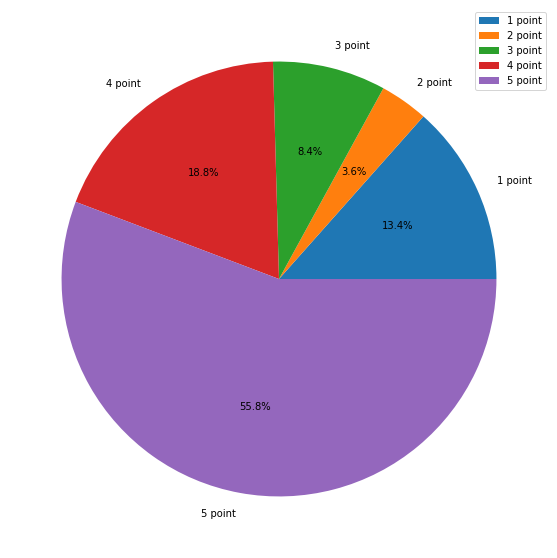

In [33]:
plt.figure(figsize=(10,10))
plt.pie(bx, labels=labels ,autopct='%1.1f%%');
plt.legend();

List of 1 and 2 star rated products

In [34]:
star12= df.loc[(df['review_score']== 1)|(df['review_score']==2)]
pd.crosstab(star12.product_category_name, star12.review_score).sort_values(by=1, ascending=False)

review_score,1,2
product_category_name,,
cama_mesa_banho,2000,618
moveis_decoracao,1377,421
informatica_acessorios,1283,297
beleza_saude,1251,256
esporte_lazer,1161,254
...,...,...
portateis_cozinha_e_preparadores_de_alimentos,3,2
artes_e_artesanato,3,0
fashion_esporte,2,1


List of 1 and 2 rated star of seller id

In [35]:
star12.groupby('seller_id')['review_score'].count().sort_values(ascending=False).nlargest(10).reset_index()

,seller_id,review_score
0,4a3ca9315b744ce9f8e9374361493884,453
1,7c67e1448b00f6e969d365cea6b010ab,423
2,6560211a19b47992c3666cc44a7e94c0,413
3,1f50f920176fa81dab994f9023523100,378
4,1025f0e2d44d7041d6cf58b6550e0bfa,317
5,cc419e0650a3c5ba77189a1882b7556a,309
6,da8622b14eb17ae2831f4ac5b9dab84a,259
7,955fee9216a65b617aa5c0531780ce60,232
8,ea8482cd71df3c1969d7b9473ff13abc,213
9,cca3071e3e9bb7d12640c9fbe2301306,209


Title of customer evaluate

In [36]:

df['review_comment_title'].replace('recomendo','Recomendo', inplace= True)

In [37]:
df.groupby('review_comment_title')['customer_id'].count().sort_values(ascending= False).nlargest(5).to_frame()

,customer_id
review_comment_title,
Recomendo,96243
Bom,598
super recomendo,548
Excelente,507
Muito bom,493


Customers who bring highest revenue for company

In [38]:

df.groupby('customer_id')['payment_value'].sum().sort_values(ascending= False).head(10).to_frame()

,payment_value
customer_id,
1617b1357756262bfa56ab541c47bc16,109312.64
bd5d39761aa56689a265d95d8d32b8be,45256.00
be1b70680b9f9694d8c70f41fa3dc92b,44048.00
05455dfa7cd02f13d132aa7a6a9729c6,36489.24
1ff773612ab8934db89fd5afa8afe506,30186.00
ec5b2ba62e574342386871631fafd3fc,29099.52
e7d6802668de6e74d0d6c56565bf2a24,22346.60
8c20d9bfbc96c5d39025d77a3ba83d7f,21874.05
f7622098214b4634b7fe7eee269b5426,19457.04


Top cities that bring the highest revenue for the company

In [39]:
df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).to_frame().head(10)

,payment_value
customer_city,
sao paulo,2902209.75
rio de janeiro,1581736.07
belo horizonte,509165.81
brasilia,435971.02
curitiba,333582.09
porto alegre,317995.72
salvador,291499.12
campinas,272689.17
goiania,215121.83
